# Sinais periódicos

Neste notebook avaliaremos a série de Fourier de alguns sinais periódicos. 

Um sinal periódico, contínuo, é aquele para o qual a seguinte propriedade é válida:
    
\begin{equation}
x(t) = x(t \pm mT_p),
\end{equation}
ou seja, o valor do sinal no instante $t$ [s] é o mesmo para o instante $t \pm mT_p$ [s]. Dessa forma, o sinal se repete a cada
período $T_p$.

$T_p$ é o chamado período fundamental do sinal periódico. Neste caso, $x(t) = x(t \pm T_p) = x(t \pm 2T_p) = ... = x(t \pm kT_p)$.

Os sinais periódicos tem uma frequência fundamental $f_1 = \frac{1}{T_p}$ (ou frequência angular fundamental $\omega_1 = \frac{2\pi}{T_p}$.



A base para a estimativa do espectro de tais sinais é a ***Série de Fourier***, que nos afirma que qualquer sinal periódico pode ser representado por uma soma infinita de exponenciais complexas.

\begin{equation}
x(t) = \sum\limits_{k=-\infty}^{\infty}\tilde{c}_k \mathrm{e}^{\mathrm{j}k \omega_1 t}
\end{equation}
com os coeficientes dados por:

\begin{equation}
\tilde{c}_k = \frac{1}{T_p}\int_{T_p} x(t)\mathrm{e}^{-\mathrm{j}k\omega_1 t}\mathrm{d}t
\end{equation}

Para investigar o espectro vimos que podemos usar a informação contida em ***exatamente um período do sinal*** $x(t)$.

## Mas e se não conhecermos o período $T_p$?

Vamos investigar então o que acontece em dois casos:

### 1. Quando medirmos um número $r$ inteiro de períodos fundamentais. 

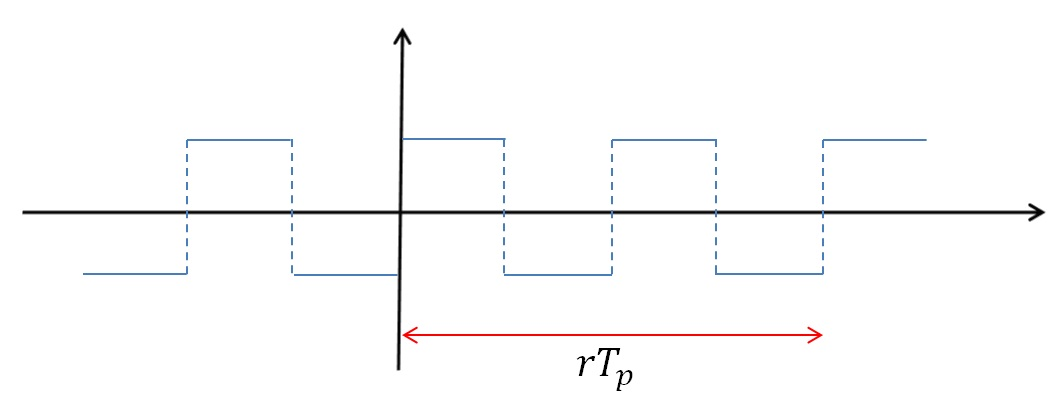

Neste caso o período fundamental pode ser visto como $T^{'}_{p} = rT_p$ [s], e a frequência fundamental $f_{1}^{'}=\frac{1}{rT_p}$, $\omega_{1}^{'} = 2\pi f_{1}^{'}$ e os coeficientes de Fourier são dados por:

\begin{equation}
\tilde{c}_k = \frac{1}{rT_p}\int_{rT_p} x(t)\mathrm{e}^{-\mathrm{j}k\omega_{1}^{'} t}\mathrm{d}t
\end{equation}

Ora, se $r$ é um número inteiro, o sinal, $x(t)$ em si não mudou nada e o resultado dos coeficientes vai ser o mesmo. No entanto, $T^{'}_{p} = rT_p$, então a frequência fundamental $f_{1}^{'}$ é menor que a frequência fundamental original.

### 2. Quando medirmos um número $r$ não inteiro de períodos fundamentais. 

Agora, se $r$ não for um número inteiro e, por exemplo:

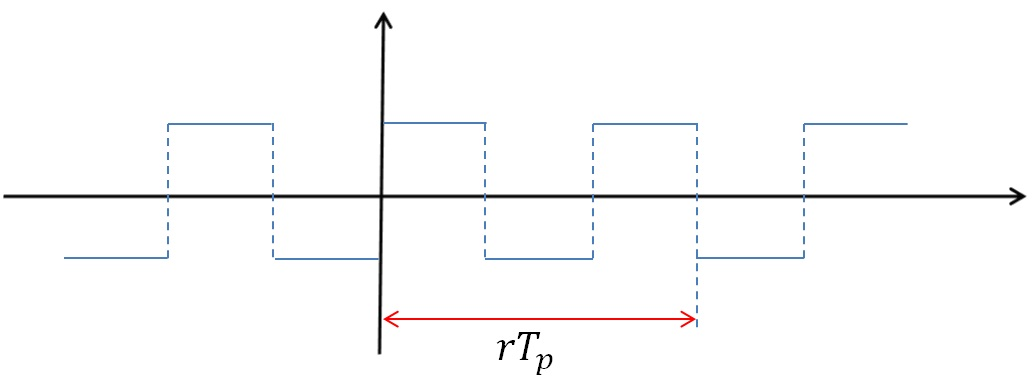

Claramente, a integral que calcula os coeficientes $\tilde{c}_k$ será diferente. Podemos ver isso pela seguinte perspectiva: Ao assumirmos que $x(t)$ é periódico, então se medirmos por uma quantidade não interia de períodos, é como se o novo sinal periódico fosse: 

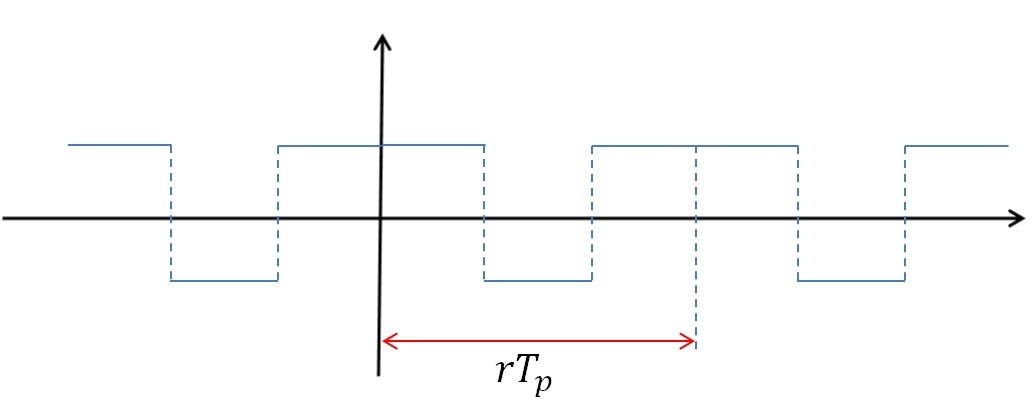

### Assim, o que isso significa para o espectro $\tilde{c}_k$?

In [1]:
# importar as bibliotecas necessárias
import numpy as np # arrays
import matplotlib.pyplot as plt # plots
plt.rcParams.update({'font.size': 14})
from scipy import signal # some signals

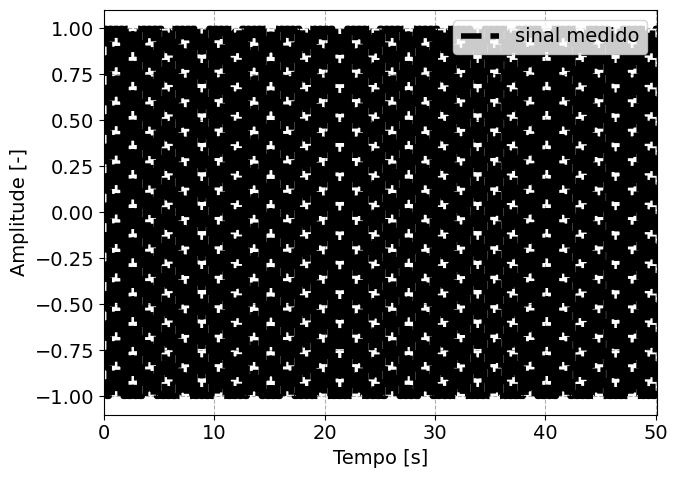

In [14]:
fs = 40
Tp = 0.5 
f1 = 1/Tp # Frequencia fundamental
w1 = 2*np.pi*f1
r = 100.28
t = np.arange(0, r*Tp, 1/fs) # vetor temporal

# onda quadrada
xt = signal.square(2 * np.pi * f1 * t)

plt.figure(figsize = (7,5))
plt.plot(t, xt, '--k', linewidth = 4, label = 'sinal medido')
#plt.stem(t, xt)
plt.legend(loc = 'upper right')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Tempo [s]')
plt.ylabel('Amplitude [-]')
plt.xlim((0, t[-1]))
plt.tight_layout();

C:\Users\Cliente\AppData\Local\Temp\ipykernel_9276\947948603.py:6: MatplotlibDeprecationWarning: The 'use_line_collection' parameter of stem() was deprecated in Matplotlib 3.6 and will be removed two minor releases later. If any parameter follows 'use_line_collection', they should be passed as keyword, not positionally.
  plt.stem(freq_vec, np.abs(ck)/len(ck), '-k', basefmt=" ", use_line_collection=  True)


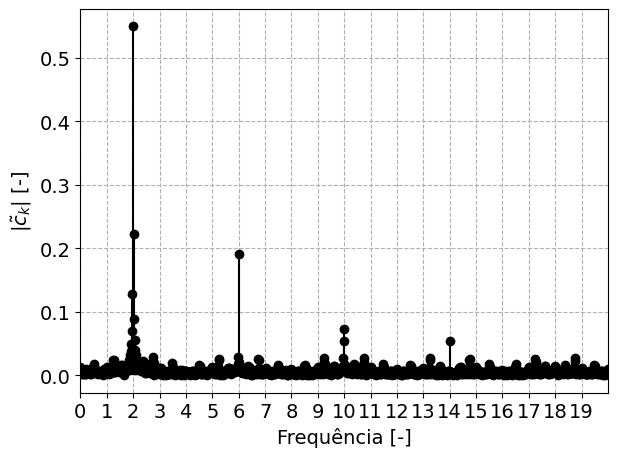

Frequency vector is: [0.00000000e+00 1.99401795e-02 3.98803589e-02 ... 3.99401795e+01
 3.99601196e+01 3.99800598e+01]


In [18]:
# espectro original
ck = np.fft.fft(xt)
freq_vec = np.linspace(0, (len(xt)-1)*fs/len(xt), len(xt))

plt.figure()
plt.stem(freq_vec, np.abs(ck)/len(ck), '-k', basefmt=" ", use_line_collection=  True)
#plt.plot(freq_vec, np.abs(ck)/len(ck), '-k')
plt.grid(linestyle = '--', which='both')
plt.xlabel('Frequência [-]')
plt.ylabel(r'$|\tilde{c}_k|$ [-]')
plt.xticks(np.arange(0, fs/2, 1))
plt.xlim((0, fs/2))
plt.tight_layout()
plt.show()

print('Frequency vector is: {}'.format(freq_vec))

In [21]:
freq_vec[11]
np.abs(ck[5])/len(ck)

0.014285714285714278

In [29]:
np.abs(ck[11])

113.50104786081614